In [1]:
%matplotlib inline

## [Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
- Some metrics are designed for binary classification tasks. These methods only evaluate positive labels & assume the positive class is labeled as ```1``` (this is configurable).
- Multiclass | multilabel methods treat data as a collection of binary problems - one per class. They can choose how to average the results in the ```average``` parameter.
    - "macro": returns the mean of the metrics - equal weight to each class.
    - "weighted": manages class imbalance. returns each class score multiplied by the class's presence.
    - "micro": gives each sample:class pair an equal contribution (sums the dividends & divisors to find an overall quotient). may be preferred in multilabel cases.
    - "samples": multilabel problems
    - "none": simply returns an array of scores for each class.    

## [Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
- Returns either the fraction (default) or count (normalize=False) of correct predictions.
- Returns a subset accuracy in multilabel classification.

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print(accuracy_score(y_true, y_pred),
      accuracy_score(y_true, y_pred, normalize=False))

0.5 2


- test classification score after randomizing (permuting) labels.
- -p-value given by percentage of runs where this score > original score.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_classes = np.unique(y).size

# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

svm = SVC(kernel='linear')
cv = StratifiedKFold(2)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.5133333333333333 (pvalue : 0.009900990099009901)


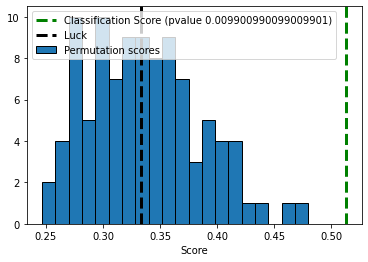

In [5]:
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

## [Balanced Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score)
- avoids inflated scores on imbalanced datasets.
- defined as $\frac{1}{2}\left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right )$.


In [6]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

## [Cohen's kappa](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score)
- Compares labelings from human annotators - not a ground-truth classifier.
- Kappa score is a number between -1,+1. Scores > 0.8 generally considered good.

In [7]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

## [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- Each row corresponds to a true class.
- Each entry _i,j_ is the number of observations actually in group _i_, but predicted to be in group _j_.
- ```normalize``` controls whether to report ratios or counts. Normalization can be 'pred' (column wise), 'true' (rows wise) or 'all' (entire matrix).

In [8]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [10]:
# binary problems
# return true negatives, false positives, false negatives, true positives.
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

Confusion matrix, not normalized
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Confusion matrix, normalized
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


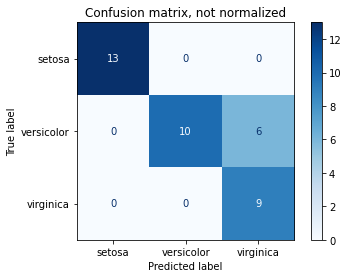

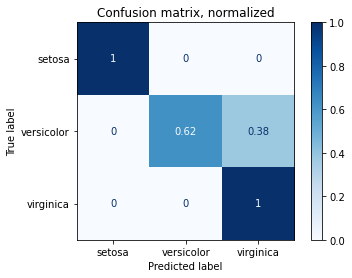

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

iris = datasets.load_iris()
X, y, names = iris.data, iris.target, iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, not normalized", None),
                  ("Confusion matrix, normalized",    'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
- text report of main classification metrics.

In [11]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, 
                            y_pred, 
                            target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



## [Hamming loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss)
- defined as $L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$

In [12]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)

0.25

In [13]:
# multilabel case, binary label indicators
hamming_loss(np.array([[0, 1], 
                       [1, 1]]), np.zeros((2, 2)))


0.75

## [Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision), [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall), [f-measure](https://en.wikipedia.org/wiki/F1_score)
- Precision = ability to accurately classify a negative sample
- Recall = ability to find all positive samples
- F-measure = weighted harmonic mean of precision & recall.
- A [precision recall curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) - returns a scoring curve across a decision threshold.

In [15]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [16]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

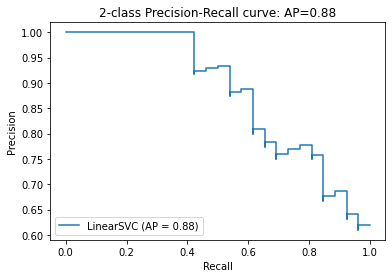

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## [Jaccard similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score)
- defined as $J(y_i, \hat{y}_i) = \frac{|y_i \cap \hat{y}_i|}{|y_i \cup \hat{y}_i|}.$

In [18]:
# binary case
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[0, 1, 1],
                   [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                   [1, 0, 0]])
jaccard_score(y_true[0], y_pred[0])

0.6666666666666666

In [20]:
# multilabel case, binary label predictors
print(jaccard_score(y_true, y_pred, average='samples'),
      jaccard_score(y_true, y_pred, average='macro'),
      jaccard_score(y_true, y_pred, average=None))

0.5833333333333333 0.6666666666666666 [0.5 0.5 1. ]


In [21]:
# multiclass problems - binarized & treated as multilabel
y_pred = [0, 2, 1, 2]
y_true = [0, 1, 2, 2]

print(jaccard_score(y_true, y_pred, average=None),
      jaccard_score(y_true, y_pred, average='macro'),
      jaccard_score(y_true, y_pred, average='micro'))

[1.   0.   0.33] 0.4444444444444444 0.3333333333333333


## [Hinge loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)
- returns the average distance between the model & data using hinge loss - a one-sided metric that only considers only prediction errors.
- defined as $L_\text{Hinge}(y, w) = \max\left\{1 - wy, 0\right\} = \left|1 - wy\right|_+$
- labels encoded as +1,-1; y = true value; w = predicted decisions.

In [22]:
# hinge loss, SVM classifer, binary class problem
from sklearn import svm
from sklearn.metrics import hinge_loss
X = [[0], [1]]
y = [-1, 1]
est = svm.LinearSVC(random_state=0)
est.fit(X, y)

pred_decision = est.decision_function([[-2], [3], [0.5]])
print(pred_decision)
print(hinge_loss([-1, 1, 1], pred_decision))

[-2.18  2.36  0.09]
0.3030367603854425


In [23]:
# hinge loss, SVM classifier, multiclass problem
X =  np.array([[0], [1], [2], [3]])
Y = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X, Y)

pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
hinge_loss(y_true, pred_decision, labels)

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0 1 2 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.5641175871501248

## [Los loss (aka logistic regression loss, cross-entropy loss)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss)
- commonly used in multinomial logistic regression & neural nets, and to find probability outputs (```predict_proba```) of a classifier instead of discrete predictions.
- defined as $L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p))$

In [25]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]

# [0.9,0.1] denotes a 90% probability that the first sample has label of zero.

y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)

0.1738073366910675

## [Matthews correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef)
- Used for binary classifiers. Considered to be a balanced measure even if the classes are of very different sizes.
- Essentially a correlation coefficient; +1 = perfect prediction; 0 = random; -1 = inverse prediction.
- Defined as $MCC = \frac{tp \times tn - fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}.$

In [26]:
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

## [Multilabel Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)
- finds a class-wise or sample-wise confusion matrix.

In [27]:
# multi-label indicators

from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],
                   [0, 1, 0]])
y_pred = np.array([[1, 0, 0],
                   [0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]])

In [28]:
# sample-wise

multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

array([[[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 1]]])

In [29]:
# multilabel CM with multi-class inputs

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
multilabel_confusion_matrix(y_true, y_pred,
                            labels=["ant", "bird", "cat"])

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

- Below: using a multi-label confusion matrix to find recall (sensitivity), specificity, fallout and miss rate for each class in a problem with multi-label indicator inputs.

In [30]:
# recall (a.k.a. true positive rate, a.k.a. sensitivity) for each class:
y_true = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [1, 1, 0]])
y_pred = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 0]])
mcm = multilabel_confusion_matrix(y_true, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([1. , 0.5, 0. ])

In [31]:
# specificity (true negative rate) for each class

tn/(tn+fp)

array([1. , 0. , 0.5])

In [32]:
# fallout (false positive rate) for each class
fp/(fp+tn)

array([0. , 1. , 0.5])

In [33]:
# miss rate (false negative rate) for each class
fn/(fn+tp)

array([0. , 0.5, 1. ])

## [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)
- A ROC Curve illustrates binary classifier performance as its discrimination threshold is varied.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

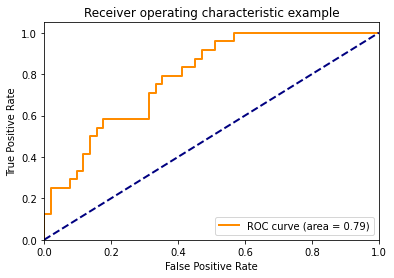

In [35]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## [ROC AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- finds the area under the ROC curve. This summarizes the curve info into one number.

In [36]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

## [Zero-One loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)
- returns the count (use ```normalize=False```) or average of 0-1 classification loss over n_samples.
- defined as $L_{0-1}(y_i, \hat{y}_i) = 1(\hat{y}_i \not= y_i)$ where 1(x) is an indicator function.

In [41]:
from sklearn.metrics import zero_one_loss
y_pred = [1, 2, 3, 4, 5, 6, 7, 8]
y_true = [2, 2, 3, 4, 5, 6, 7, 9]

print(zero_one_loss(y_true, y_pred),
      zero_one_loss(y_true, y_pred, normalize=False))

0.25 2


## [Brier Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss)
- measures the accuracy of binary classifiers. it is useful when predictions need to assign probabilities to a set of mutually exclusive discrete outcomes.
- returns a score of the mean square difference between predictions and actual values. lower scores (closer to 0) imply more accurate predictions.

In [42]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob             = np.array([ 0.1,    0.9,   0.8,   0.4])
y_pred             = np.array([ 0,      1,     1,     0])

print(brier_score_loss(y_true, y_prob),
      brier_score_loss(y_true, 1 - y_prob, pos_label=0),
      brier_score_loss(y_true_categorical, y_prob, pos_label="ham"),
      brier_score_loss(y_true, y_prob > 0.5))

0.055 0.055 0.055 0.0
